# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [2]:
# Algumas configurações para o matplotlib.

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [18]:
countries = pd.read_csv("countries.csv")

In [19]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [20]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country             227 non-null object
Region              227 non-null object
Population          227 non-null int64
Area                227 non-null int64
Pop_density         227 non-null object
Coastline_ratio     227 non-null object
Net_migration       224 non-null object
Infant_mortality    224 non-null object
GDP                 226 non-null float64
Literacy            209 non-null object
Phones_per_1000     223 non-null object
Arable              225 non-null object
Crops               225 non-null object
Other               225 non-null object
Climate             205 non-null object
Birthrate           224 non-null object
Deathrate           223 non-null object
Agriculture         212 non-null object
Industry            211 non-null object
Service             212 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 35.6+ KB


In [6]:
countries.Region[0]

'ASIA (EX. NEAR EAST)         '

## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [14]:
# Sua análise começa aqui.
df = pd.read_csv("countries.csv",decimal = ',', header=0, names=new_column_names)

df['Country'] = df.Country.str.strip()
df['Region'] = df.Region.str.strip()

df.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country             227 non-null object
Region              227 non-null object
Population          227 non-null int64
Area                227 non-null int64
Pop_density         227 non-null float64
Coastline_ratio     227 non-null float64
Net_migration       224 non-null float64
Infant_mortality    224 non-null float64
GDP                 226 non-null float64
Literacy            209 non-null float64
Phones_per_1000     223 non-null float64
Arable              225 non-null float64
Crops               225 non-null float64
Other               225 non-null float64
Climate             205 non-null float64
Birthrate           224 non-null float64
Deathrate           223 non-null float64
Agriculture         212 non-null float64
Industry            211 non-null float64
Service             212 non-null float64
dtypes: float64(16), int64(2), object(2)
memory usage: 35.6+ KB


In [9]:
df.Region[0]

'ASIA (EX. NEAR EAST)'

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [6]:
def q1():
    unique_regions = df.Region.unique()
    return list(np.sort(unique_regions))

q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [7]:
from sklearn.preprocessing import KBinsDiscretizer

def q2():
    est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    X = df['Pop_density'].values.reshape(-1,1)
    pop_density_bins = est.fit_transform(X)
    # Since we have 10 bins from 0 to 9, bins >8 (bins == 9) represent countries over 90 percentile
    return  len((df[pop_density_bins == 9]['Country']).unique())

q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [17]:
df[["Region","Climate"]].isnull().sum()

Region      0
Climate    22
dtype: int64

In [21]:
def q3():
    df_aux = df.copy()
    df_aux["Region"] = df["Region"].astype('category')
    df_aux["Climate"] = df["Climate"].fillna(-1).astype('category')
    
    new_features = pd.get_dummies(df_aux[['Region', 'Climate']])
    new_cols = new_features.shape[1]

    return new_cols

q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [10]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]


In [22]:
def q4():
    numeric_features = list(df.select_dtypes(include=['int64', 'float64']).columns)
    categorical_features = list(df.select_dtypes(include=['object','bool']).columns)
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("standart_scaler", StandardScaler()) ])

    #preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)], remainder = 'passthrough')
    preprocessor = ColumnTransformer(
                    transformers=[('cat', 'passthrough', categorical_features),
                                 ('num', numeric_transformer, numeric_features)])
    
    pipeline_transformation = preprocessor.fit_transform(df)
    df_test_country = pd.DataFrame(test_country, index= list(df.columns))
    
    test_country_transformation = preprocessor.transform(df_test_country.transpose())
    df_test_country_transformation = pd.DataFrame(test_country_transformation , columns = df.columns)
    
    return round(df_test_country_transformation.loc[0,'Arable'],3)

q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [23]:
def pd_of_stats(df,col):
    '''
    Create a dataframe of descriptive Statistics
    '''
    stats = dict()
    stats['Mean']  = df[col].mean()
    stats['Std']   = df[col].std()
    stats['Var'] = df[col].var()
    stats['Kurtosis'] = df[col].kurtosis()
    stats['Skewness'] = df[col].skew()
    stats['CoefVar'] = stats['Std'] / stats['Mean']
    
    return pd.DataFrame(stats, index = col).T.round(2)


def pd_of_stats_quantile(df,col):
    '''
    Create a dataframe of quantile Statistics
    '''
    df_no_na = df[col].dropna()
    stats_q = dict()

    stats_q['Min'] = df[col].min()
    label = {0.25:"Q1", 0.5:'Median', 0.75:"Q3"}
    for percentile in np.array([0.25, 0.5, 0.75]):
        stats_q[label[percentile]] = df_no_na.quantile(percentile)
    stats_q['Max'] = df[col].max()
    stats_q['Range'] = stats_q['Max']-stats_q['Min']
    stats_q['IQR'] = stats_q['Q3']-stats_q['Q1']

    return pd.DataFrame(stats_q, index = col).T.round(2)    

In [52]:
pd_of_stats(df,['Net_migration'])

,Net_migration
Mean,0.04
Std,4.89
Var,23.90
Kurtosis,6.39
Skewness,0.13
CoefVar,128.24


In [53]:
 pd_of_stats_quantile(df,['Net_migration'])

,Net_migration
Min,-20.99
Q1,-0.93
Median,0.00
Q3,1.00
Max,23.06
Range,44.05
IQR,1.92


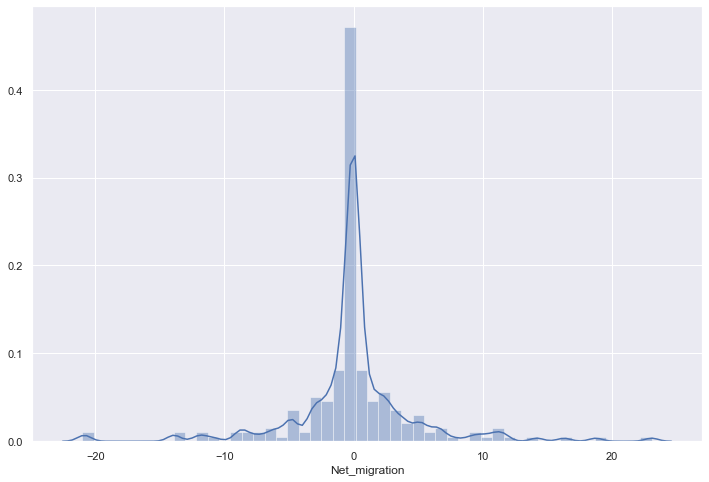

In [82]:
sns.distplot(df.Net_migration.dropna())

In [24]:
def q5():
    var = df.Net_migration.dropna().copy()
    q1, q3 = var.quantile([0.25, 0.75])
    iqr = q3 - q1
    cutoff = 1.5*iqr
    lowerbound, upperbound = q1 - cutoff, q3 + cutoff
    print(f'Lower Bound: {lowerbound}, Upper Bound:{upperbound}')
    n_outliers = len(var[~var.between(lowerbound, upperbound, inclusive=True)])
    outliers_abaixo = len(var[var < lowerbound])
    outliers_acima  = len(var[var > upperbound])

    percent_outlier = n_outliers/len(var)
    print(f'Outliers/Observations: {round(percent_outlier*100,3)}, Outliers: {n_outliers}, Below threshold: {outliers_abaixo}, Above threshold: {outliers_acima}')
    return (outliers_abaixo, outliers_acima, False)

q5()

Lower Bound: -3.8149999999999995, Upper Bound:3.885
Outliers/Observations: 22.321, Outliers: 50, Below threshold: 24, Above threshold: 26


(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [11]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroups = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [28]:
print('Groups :', newsgroups.target_names)
print('Length :',len(newsgroups.data))

Groups : ['comp.graphics', 'rec.motorcycles', 'sci.electronics']
Length : 1773


In [34]:
#first entry
print(f'{newsgroups.data[0]}')

From: rubin@cis.ohio-state.edu (Daniel J Rubin)
Subject: Re: what to do with old 256k SIMMs?
Organization: The Ohio State University Dept. of Computer and Info. Science
Lines: 18
NNTP-Posting-Host: diplodocus.cis.ohio-state.edu

>>	I was wondering if people had any good uses for old
>>256k SIMMs.  I have a bunch of them for the Apple Mac
>>and I know lots of other people do to.  I have tried to
>>sell them but have gotten NO interest.

How hard would it be to somehow interface them to some of the popular 
Motorola microcontrollers.  I am a novice at microcontrollers, but I am
starting to get into them for some of my projects.  I have several 256k
SIMMs laying around from upgraded Macs and if I could use them as "free"
memory in one or two of my projects that would be great.  One project that
comes to mind is a Caller ID device that would require quite a bit of RAM
to store several hundered CID records etc...

                                                             - Dan
-- 
      

In [30]:
newsgroups.target_names[newsgroups.target[0]]

'sci.electronics'

In [92]:
def q6():
    count_vect = CountVectorizer()
    newsgroups_counts = count_vect.fit_transform(newsgroups.data)
    print('Shape', newsgroups_counts.shape)
    #get the position that corresponds to phone
    phone_idx = count_vect.vocabulary_.get(u"phone")
    tf_phone = np.sum(newsgroups_counts[:,phone_idx]).item()
    n_doc_phone = np.sum(newsgroups_counts[:,phone_idx]!=0)
    print(f'Number of times the word phone appeared: {tf_phone}')
    print(f'Number of documents the word phone appeared: {n_doc_phone}')
    
    return tf_phone

q6()

Shape (1773, 27335)
Number of times the word phone appeared: 213
Number of documents the word phone appeared: 143


213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [12]:
def q7():
    tfidf_vectorizer = TfidfVectorizer()
    newsgroups_tfidf_vectorized = tfidf_vectorizer.fit_transform(newsgroups.data)
    
    phone_idx = tfidf_vectorizer.vocabulary_.get(u"phone")
    tf_idf_phone = np.sum(newsgroups_tfidf_vectorized[:,phone_idx]).item()
    
    print('TF-IDF', tf_idf_phone)  
    return round(tf_idf_phone,3)

q7()

TF-IDF 8.88774594667355


8.888